<a href="https://colab.research.google.com/github/Anakin-Chauhan/Storage_Space/blob/main/Storage_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os

In [ ]:
import cv2   #computer vision
import imghdr #helps us in checking the img extension

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/data/Storage 1'

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
os.listdir(data_dir)

['No_Storage', 'Storage']

In [ ]:
for image_class in os.listdir(data_dir):   #accessing our data (folders)
  for image in os.listdir(os.path.join(data_dir, image_class)):  #selecting each folder at a time
    image_path = os.path.join(data_dir, image_class, image) #selcting each image at a time
    try:
      img = cv2.imread(image_path) #reading the image
      tip = imghdr.what(image_path) #assigning varialbe to image extension
      if tip not in image_exts:
        print('Image not in exts{}'.format(image_path))
        os.remove(image_path) # removing image if extension on in list
    except Exception as e:
      print('issue with img {}'.format(image_path)) # will tell us if any other issue with image

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir) #making a dataset of images

Found 2657 files belonging to 2 classes.


In [ ]:
print(data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
data_iterator = data.as_numpy_iterator() #to iterate the dataset

In [ ]:
batch = data_iterator.next() #accessing batches one by one

In [ ]:
batch[1]

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

0
1
2
3


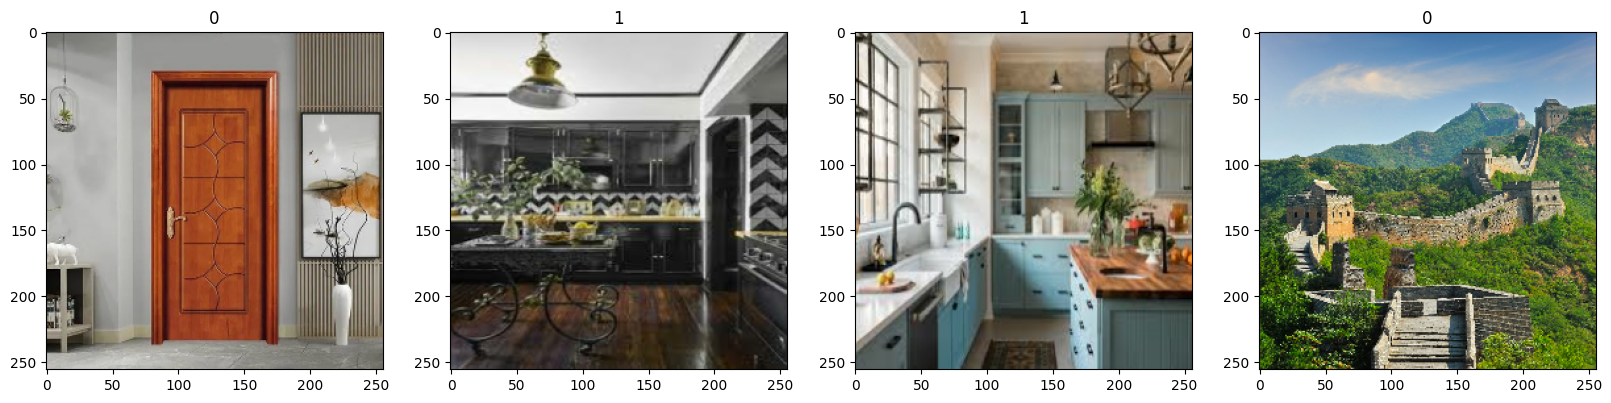

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
   ax[idx].imshow(img.astype(int))
   ax[idx].title.set_text(batch[1][idx])
   print(idx)

storage = 1
no storage = 0

pre processing,
splitting and scalling

In [ ]:
data = data.map(lambda x,y: (x/255,y)) #scaling

checking the scaling

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
imgs = scaled_iterator.next()

In [ ]:
imgs[0].max()

1.0

In [ ]:
imgs[0].min()

0.0

In [ ]:
len(data)

84

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Model 0

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir = '/content/drive/MyDrive/Colab Notebooks/Storage1_logs'

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_0/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
hist_0 = model.fit(train, epochs=10, validation_data = val, callbacks=[cp_callback])

Epoch 1/10
58/58 [==============================] - ETA: 0s - loss: 0.7402 - accuracy: 0.5156
Epoch 1: val_loss improved from inf to 0.67707, saving model to /content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_0/cp.ckpt
58/58 [==============================] - 64s 857ms/step - loss: 0.7402 - accuracy: 0.5156 - val_loss: 0.6771 - val_accuracy: 0.5184
Epoch 2/10
58/58 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.5641
Epoch 2: val_loss improved from 0.67707 to 0.63728, saving model to /content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_0/cp.ckpt
58/58 [==============================] - 62s 1s/step - loss: 0.6758 - accuracy: 0.5641 - val_loss: 0.6373 - val_accuracy: 0.6507
Epoch 3/10
58/58 [==============================] - ETA: 0s - loss: 0.5761 - accuracy: 0.6972
Epoch 3: val_loss improved from 0.63728 to 0.49315, saving model to /content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_0/cp.ckpt
58/58 [==============================] - 

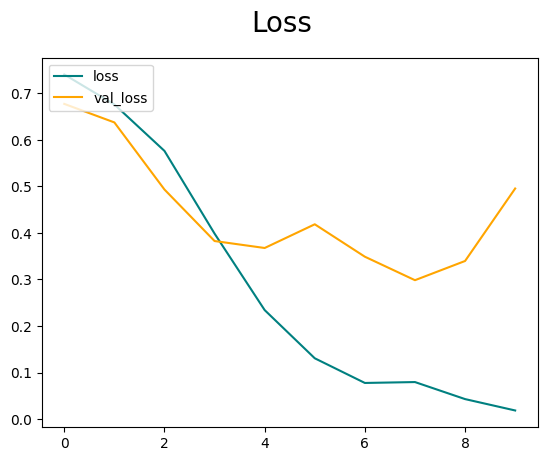

In [ ]:
fig = plt.figure()
plt.plot(hist_0.history['loss'], color='teal', label='loss')
plt.plot(hist_0.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

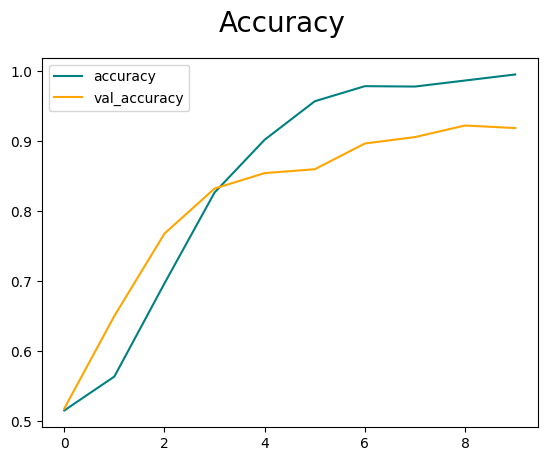

In [ ]:
fig = plt.figure()
plt.plot(hist_0.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_0.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, TrueNegatives, TruePositives, FalseNegatives, FalsePositives

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
tn = TrueNegatives()
tp = TruePositives()
fn = FalseNegatives()
fp = FalsePositives()

In [ ]:
for batch in test.as_numpy_iterator():
  X , y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)
  tn.update_state(y, yhat)
  tp.update_state(y, yhat)
  fn.update_state(y, yhat)
  fp.update_state(y, yhat)

1/1 [==============================] - 0s 167ms/step


In [ ]:
print(f"model_0: precision {pre.result()},\n recall {re.result()},\n accuracy {acc.result()},\n True Positive{tn.result()},\n True Positive {tp.result()},\n False Negative {fn.result()},\n False Positive {fp.result()}")

model_0: precision 0.9224137663841248,
 recall 0.8842975497245789,
 accuracy 0.9105058312416077,
 True Positive127.0,
 True Positive 107.0,
 False Negative 14.0,
 False Positive 9.0


In [ ]:
model.save('storage_basic.keras')
model.save('storage_basic', save_format = 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


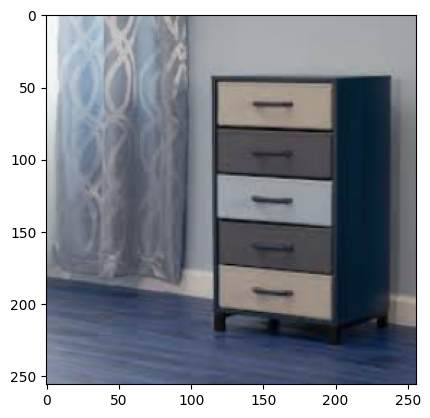

1/1 [==============================] - 0s 20ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/drawer.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

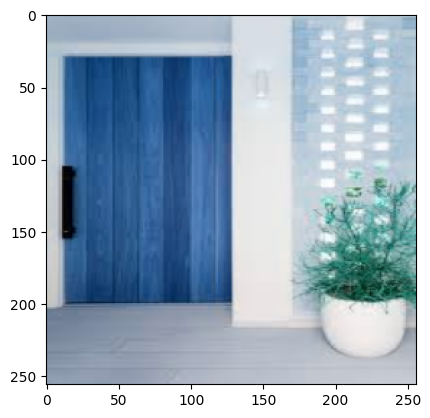

1/1 [==============================] - 0s 22ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Door.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

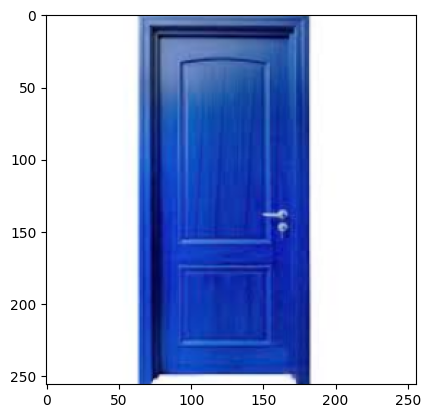

1/1 [==============================] - 0s 29ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/door2.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

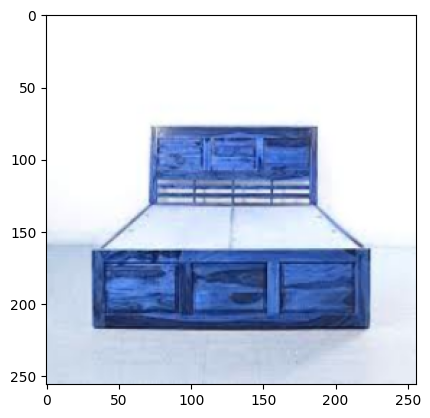

1/1 [==============================] - 0s 19ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bed.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

loading best weights of this model

In [ ]:
model_best_weights = Sequential()

model_best_weights.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model_best_weights.add(MaxPooling2D())
model_best_weights.add(Conv2D(32, (3,3), 1, activation='relu'))
model_best_weights.add(MaxPooling2D())
model_best_weights.add(Conv2D(16, (3,3), 1, activation='relu'))
model_best_weights.add(MaxPooling2D())
model_best_weights.add(Flatten())
model_best_weights.add(Dense(256, activation='relu'))
model_best_weights.add(Dense(1, activation='sigmoid'))

model_best_weights.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model_best_weights.load_weights(checkpoint_path)
for batch in test.as_numpy_iterator():
  X , y = batch
  yhat = model_best_weights.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)
  tn.update_state(y, yhat)
  tp.update_state(y, yhat)
  fn.update_state(y, yhat)
  fp.update_state(y, yhat)

print(f"model with best weights: precision {pre.result()},\n recall {re.result()},\n accuracy {acc.result()},\n True Positive{tn.result()},\n True Positive {tp.result()},\n False Negative {fn.result()},\n False Positive {fp.result()}")

1/1 [==============================] - 0s 103ms/step
model with best weights: precision 0.9098360538482666,
 recall 0.8844621777534485,
 accuracy 0.9007782340049744,
 True Positive241.0,
 True Positive 222.0,
 False Negative 29.0,
 False Positive 22.0


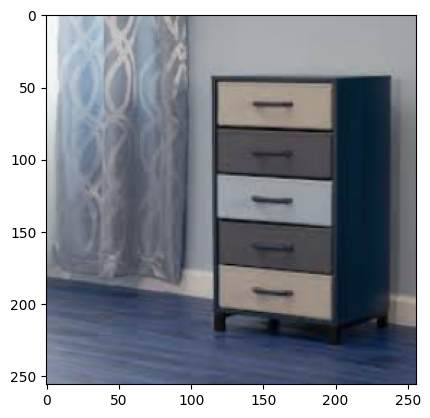

1/1 [==============================] - 0s 19ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/drawer.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

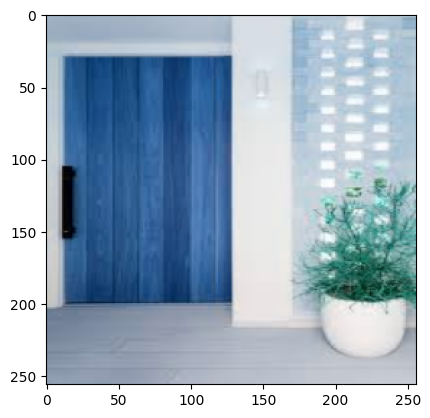

1/1 [==============================] - 0s 18ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Door.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

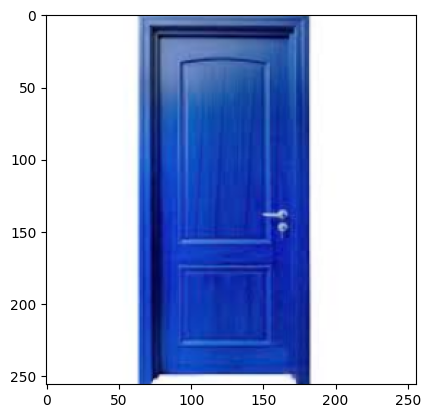

1/1 [==============================] - 0s 21ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/door2.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

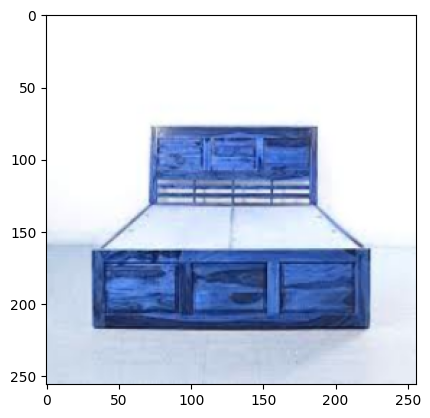

1/1 [==============================] - 0s 20ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bed.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

Model 1

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model_1.add(Conv2D(32, (3,3), 1, activation='relu'))
model_1.add(Conv2D(16, (3,3), 1, activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 252, 252, 32)      4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 250, 250, 16)      4624      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 125, 125, 16)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 250000)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               64000256  
                                                      

In [ ]:
checkpoint_path_1 = "/content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path_1)

# Create a callback that saves the model's weights
cp_callback_1 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_1,
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
hist_1 = model_1.fit(train, epochs=20, validation_data = val, callbacks=[cp_callback_1])

Epoch 1/20
58/58 [==============================] - ETA: 0s - loss: 1.8456 - accuracy: 0.5517
Epoch 1: val_loss improved from inf to 0.68196, saving model to /content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_1/cp.ckpt
58/58 [==============================] - 71s 1s/step - loss: 1.8456 - accuracy: 0.5517 - val_loss: 0.6820 - val_accuracy: 0.5643
Epoch 2/20
58/58 [==============================] - ETA: 0s - loss: 0.5540 - accuracy: 0.7344
Epoch 2: val_loss improved from 0.68196 to 0.47407, saving model to /content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_1/cp.ckpt
58/58 [==============================] - 57s 948ms/step - loss: 0.5540 - accuracy: 0.7344 - val_loss: 0.4741 - val_accuracy: 0.7960
Epoch 3/20
58/58 [==============================] - ETA: 0s - loss: 0.2133 - accuracy: 0.9235
Epoch 3: val_loss improved from 0.47407 to 0.35319, saving model to /content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_1/cp.ckpt
58/58 [==============================] - 

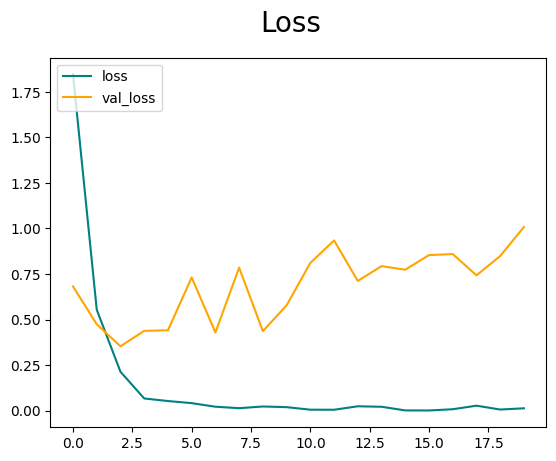

In [ ]:
fig = plt.figure()
plt.plot(hist_1.history['loss'], color='teal', label='loss')
plt.plot(hist_1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

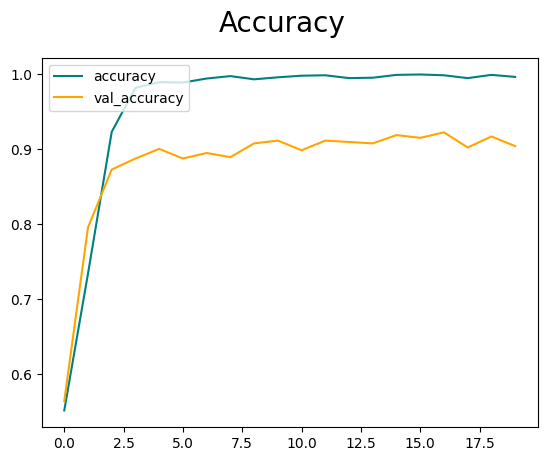

In [ ]:
fig = plt.figure()
plt.plot(hist_1.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
for batch in test.as_numpy_iterator():
  X , y = batch
  yhat = model_1.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)
  tn.update_state(y, yhat)
  tp.update_state(y, yhat)
  fn.update_state(y, yhat)
  fp.update_state(y, yhat)

1/1 [==============================] - 0s 159ms/step


In [ ]:
print(f"model_1: precision {pre.result()},\n recall {re.result()},\n accuracy {acc.result()},\n True Positive{tn.result()},\n True Positive {tp.result()},\n False Negative {fn.result()},\n False Positive {fp.result()}")

model_1: precision 0.901098906993866,
 recall 0.8586387634277344,
 accuracy 0.8832684755325317,
 True Positive353.0,
 True Positive 328.0,
 False Negative 54.0,
 False Positive 36.0


In [ ]:
model_1.save('storage_no_max_pool.keras')
model_1.save('storage_no_max_pool', save_format = 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


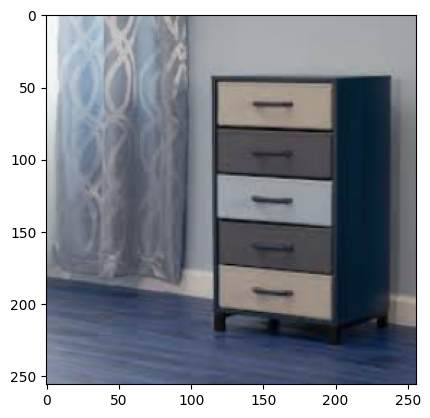

1/1 [==============================] - 0s 29ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/drawer.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_1.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

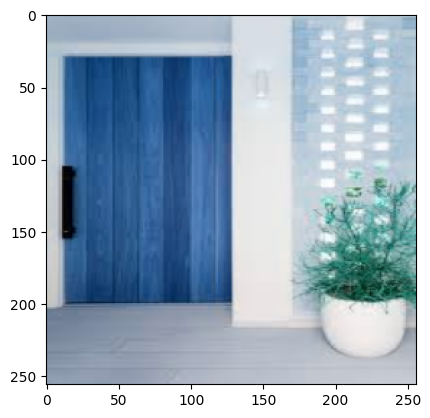

1/1 [==============================] - 0s 32ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Door.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_1.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

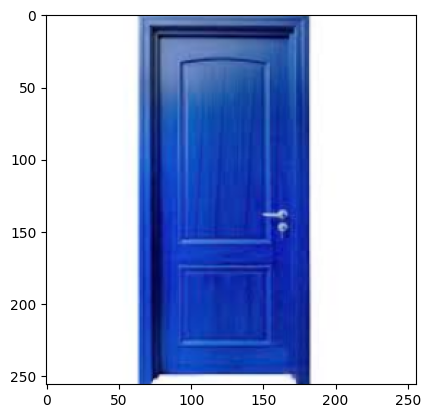

1/1 [==============================] - 0s 36ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/door2.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_1.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

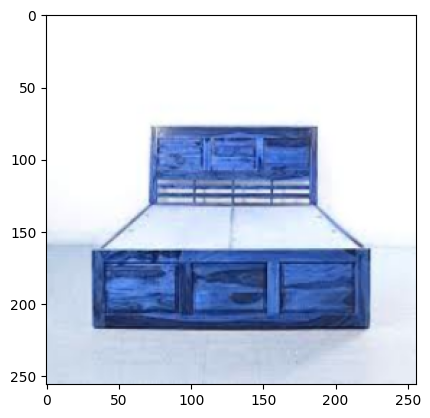

1/1 [==============================] - 0s 29ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bed.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_1.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

loading best weights of this model

In [ ]:
model_1_best_weights = Sequential()

model_1_best_weights.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model_1_best_weights.add(Conv2D(32, (3,3), 1, activation='relu'))
model_1_best_weights.add(Conv2D(16, (3,3), 1, activation='relu'))
model_1_best_weights.add(MaxPooling2D())
model_1_best_weights.add(Flatten())
model_1_best_weights.add(Dense(256, activation='relu'))
model_1_best_weights.add(Dense(1, activation='sigmoid'))

model_1_best_weights.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model_1_best_weights.load_weights(checkpoint_path_1)
for batch in test.as_numpy_iterator():
  X , y = batch
  yhat = model_1_best_weights.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)
  tn.update_state(y, yhat)
  tp.update_state(y, yhat)
  fn.update_state(y, yhat)
  fp.update_state(y, yhat)

print(f"model_1 with best weights: precision {pre.result()},\n recall {re.result()},\n accuracy {acc.result()},\n True Positive{tn.result()},\n True Positive {tp.result()},\n False Negative {fn.result()},\n False Positive {fp.result()}")

1/1 [==============================] - 0s 71ms/step
model_1 with best weights: precision 0.8777555227279663,
 recall 0.8656126260757446,
 accuracy 0.8745136260986328,
 True Positive461.0,
 True Positive 438.0,
 False Negative 68.0,
 False Positive 61.0


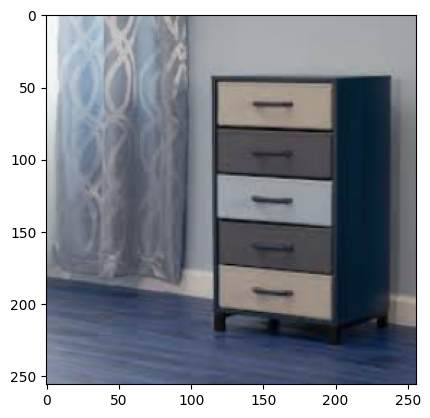

1/1 [==============================] - 0s 22ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/drawer.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_1_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

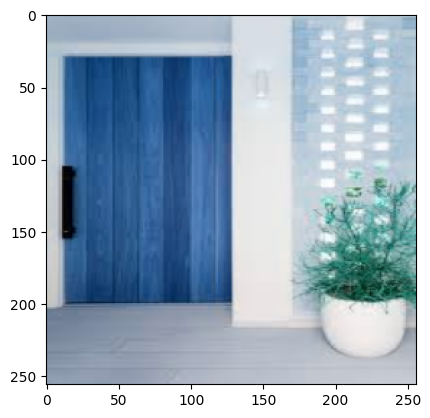

1/1 [==============================] - 0s 20ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Door.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_1_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

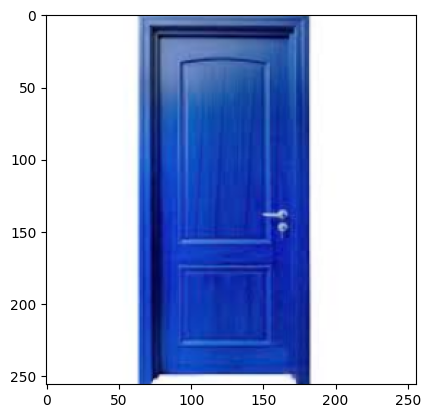

1/1 [==============================] - 0s 17ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/door2.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_1_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

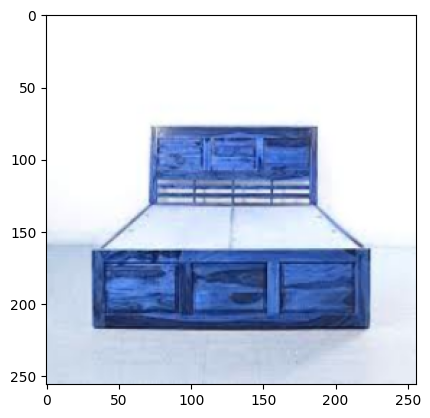

1/1 [==============================] - 0s 18ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bed.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_1_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

Model 2

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(32, (3,3), 1, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(16, (3,3), 1, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(32, (3,3), 1, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(16, (3,3), 1, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 16)       

In [ ]:
checkpoint_path_2 = "/content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path_2)

# Create a callback that saves the model's weights
cp_callback_2 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_2,
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
hist_2 = model_2.fit(train, epochs=20, validation_data = val, callbacks=[cp_callback_2])

Epoch 1/20
58/58 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.5318
Epoch 1: val_loss improved from inf to 0.67980, saving model to /content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_2/cp.ckpt
58/58 [==============================] - 49s 724ms/step - loss: 0.6917 - accuracy: 0.5318 - val_loss: 0.6798 - val_accuracy: 0.6507
Epoch 2/20
58/58 [==============================] - ETA: 0s - loss: 0.6509 - accuracy: 0.6148
Epoch 2: val_loss improved from 0.67980 to 0.59150, saving model to /content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_2/cp.ckpt
58/58 [==============================] - 46s 743ms/step - loss: 0.6509 - accuracy: 0.6148 - val_loss: 0.5915 - val_accuracy: 0.6746
Epoch 3/20
58/58 [==============================] - ETA: 0s - loss: 0.5560 - accuracy: 0.7128
Epoch 3: val_loss improved from 0.59150 to 0.52850, saving model to /content/drive/MyDrive/Colab Notebooks/Storage1_logs/training_2/cp.ckpt
58/58 [==============================]

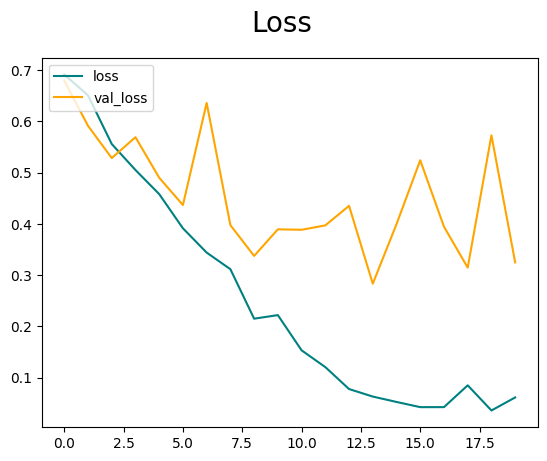

In [ ]:
fig = plt.figure()
plt.plot(hist_2.history['loss'], color='teal', label='loss')
plt.plot(hist_2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

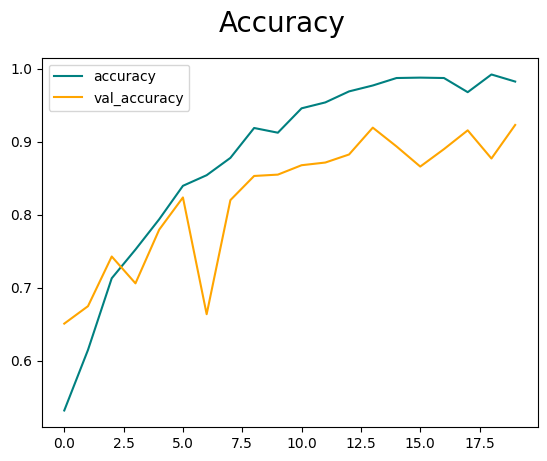

In [ ]:
fig = plt.figure()
plt.plot(hist_2.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_2.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
for batch in test.as_numpy_iterator():
  X , y = batch
  yhat = model_2.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)
  tn.update_state(y, yhat)
  tp.update_state(y, yhat)
  fn.update_state(y, yhat)
  fp.update_state(y, yhat)

1/1 [==============================] - 0s 147ms/step


In [ ]:
print(f"model_2: precision {pre.result()},\n recall {re.result()},\n accuracy {acc.result()},\n True Positive{tn.result()},\n True Positive {tp.result()},\n False Negative {fn.result()},\n False Positive {fp.result()}")

model_2: precision 0.8732171058654785,
 recall 0.8732171058654785,
 accuracy 0.8754863739013672,
 True Positive574.0,
 True Positive 551.0,
 False Negative 80.0,
 False Positive 80.0


In [ ]:
model_2.save('storage_basic.keras')
model_2.save('storage_basic', save_format = 'h5')

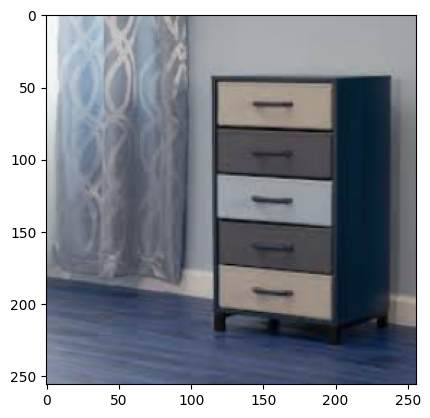

1/1 [==============================] - 0s 19ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/drawer.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_2.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

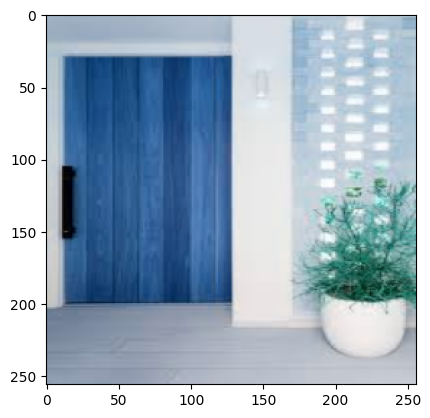

1/1 [==============================] - 0s 20ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Door.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_2.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

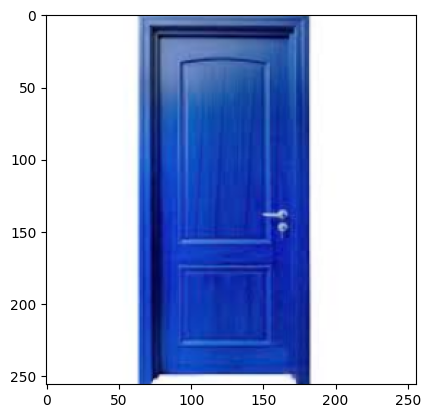

1/1 [==============================] - 0s 18ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/door2.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_2.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

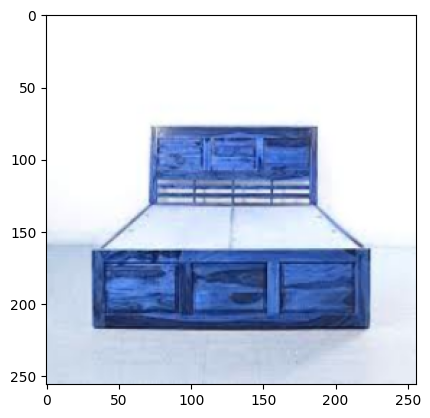

1/1 [==============================] - 0s 22ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bed.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_2.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

loading best weights of this model

In [ ]:
model_2_best_weights = Sequential()

model_2_best_weights.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model_2_best_weights.add(MaxPooling2D())
model_2_best_weights.add(Conv2D(32, (3,3), 1, activation='relu'))
model_2_best_weights.add(MaxPooling2D())
model_2_best_weights.add(Conv2D(16, (3,3), 1, activation='relu'))
model_2_best_weights.add(MaxPooling2D())
model_2_best_weights.add(Conv2D(32, (3,3), 1, activation='relu'))
model_2_best_weights.add(MaxPooling2D())
model_2_best_weights.add(Conv2D(16, (3,3), 1, activation='relu'))
model_2_best_weights.add(MaxPooling2D())
model_2_best_weights.add(Flatten())
model_2_best_weights.add(Dense(256, activation='relu'))
model_2_best_weights.add(Dense(1, activation='sigmoid'))

model_2_best_weights.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model_2_best_weights.load_weights(checkpoint_path_2)
for batch in test.as_numpy_iterator():
  X , y = batch
  yhat = model_2_best_weights.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)
  tn.update_state(y, yhat)
  tp.update_state(y, yhat)
  fn.update_state(y, yhat)
  fp.update_state(y, yhat)

print(f"model with best weights: precision {pre.result()},\n recall {re.result()},\n accuracy {acc.result()},\n True Positive{tn.result()},\n True Positive {tp.result()},\n False Negative {fn.result()},\n False Positive {fp.result()}")

1/1 [==============================] - 0s 150ms/step
model with best weights: precision 0.8717277646064758,
 recall 0.8797886371612549,
 accuracy 0.8774319291114807,
 True Positive687.0,
 True Positive 666.0,
 False Negative 91.0,
 False Positive 98.0


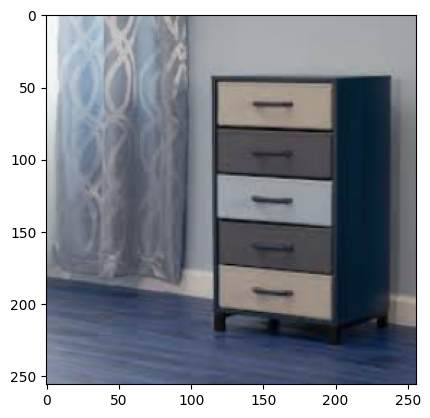

1/1 [==============================] - 0s 28ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/drawer.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_2_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

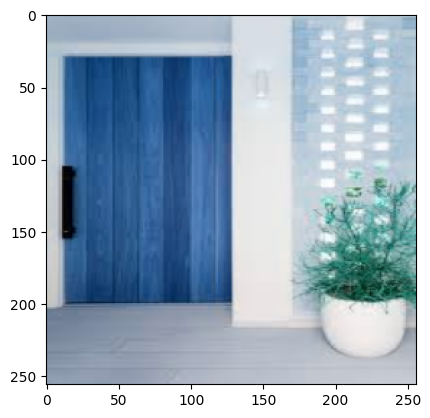

1/1 [==============================] - 0s 22ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Door.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_2_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

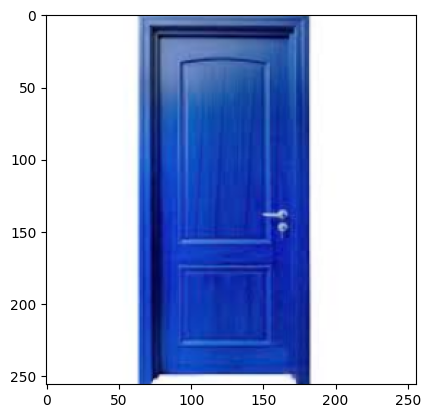

1/1 [==============================] - 0s 19ms/step
No storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/door2.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_2_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')

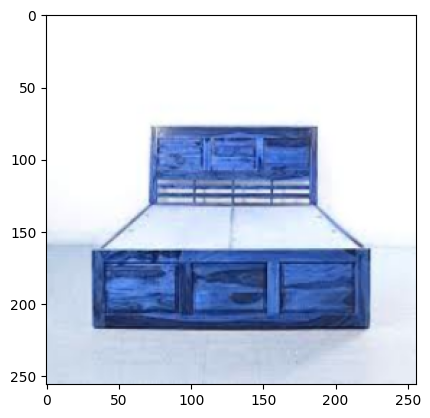

1/1 [==============================] - 0s 18ms/step
Storage


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bed.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model_2_best_weights.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Storage')
else:
    print(f'No storage')